# Параметр Тумре

In [2]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import scipy.interpolate as inter

In [4]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [5]:
Distance = 10.57 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [63]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [64]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [65]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [66]:
np.save('./data/Qg.npy', Qg)
np.save('./data/Qs_min.npy', Qs_min)
np.save('./data/Qs_max.npy', Qs_max)
np.save('./data/Qeff_min.npy', Qeff_min)
np.save('./data/Qeff_max.npy', Qeff_max)
np.save('./data/bark.npy',bark)
np.save('./data/bark_max.npy',bark_max)

Text(0.5, 1.0, '$H_{\\alpha}$')

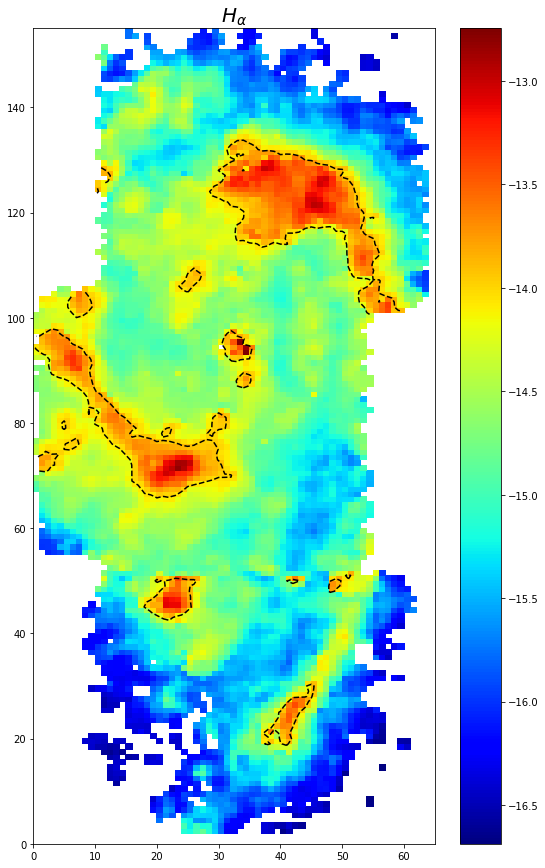

In [67]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha), cmap='jet')
plt.colorbar()
plt.title(r'$H_{\alpha}$', fontsize=20)

In [68]:
Qg = np.load('./data/Qg.npy')
Qs_min = np.load('./data/Qs_min.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qs_max = np.load('./data/Qs_max.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
bark = np.load('./data/bark.npy')
bark_max = np.load('./data/bark_max.npy')

Text(0.5, 1.0, '$\\bar{k}$')

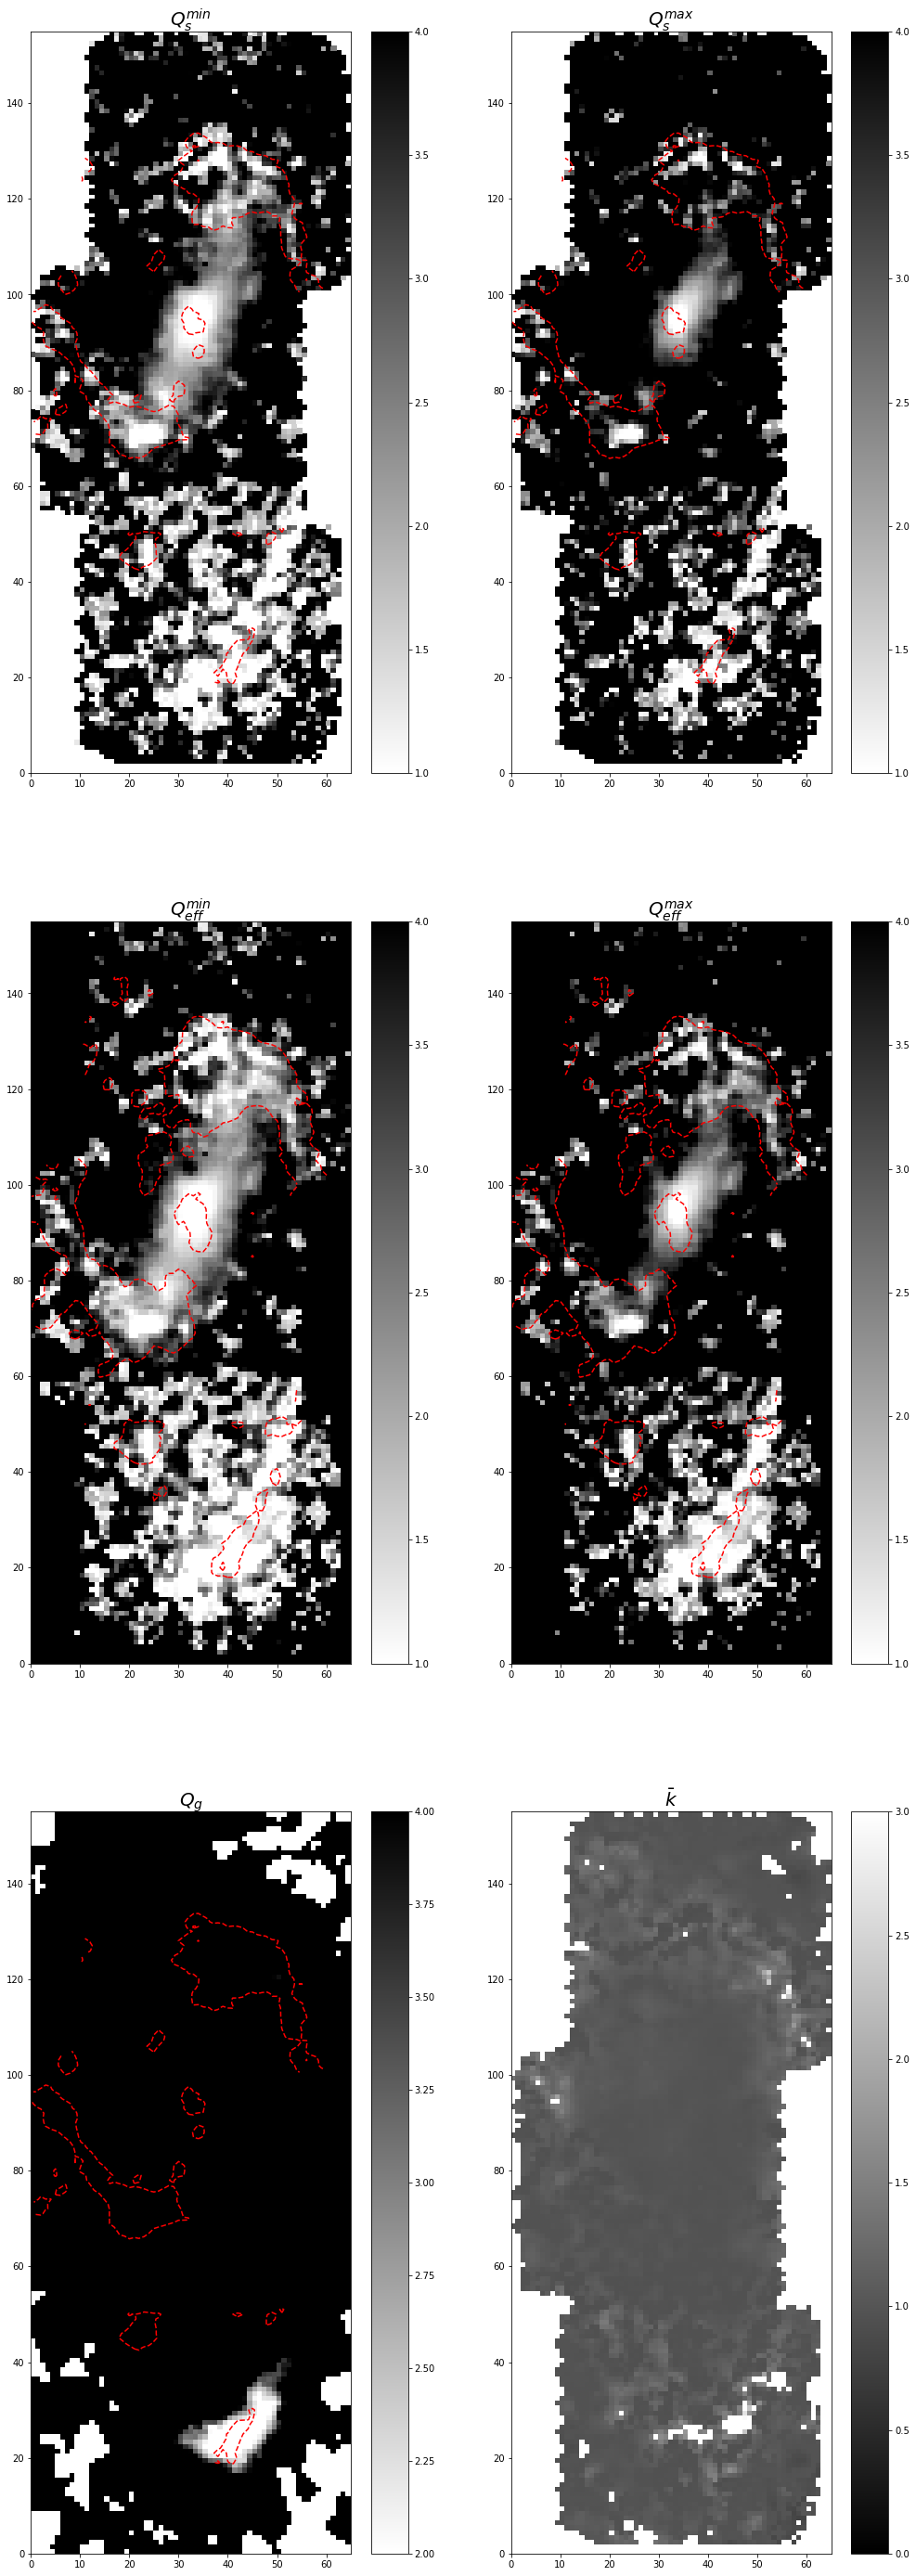

In [69]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 50])
plt.subplot(3,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qs_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{s}^{min}$', fontsize=20)

plt.subplot(3,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qs_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{s}^{max}$', fontsize=20)

plt.subplot(3,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(3,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(3,2,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{g}$', fontsize=20)

plt.subplot(3,2,6)
quadmesh = plt.pcolormesh(X, Y, bark, cmap='gray')
quadmesh.set_clim(vmin=0., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\bar{k}$', fontsize=20)

Text(0.5, 1.0, '$Q_{eff}^{max}$')

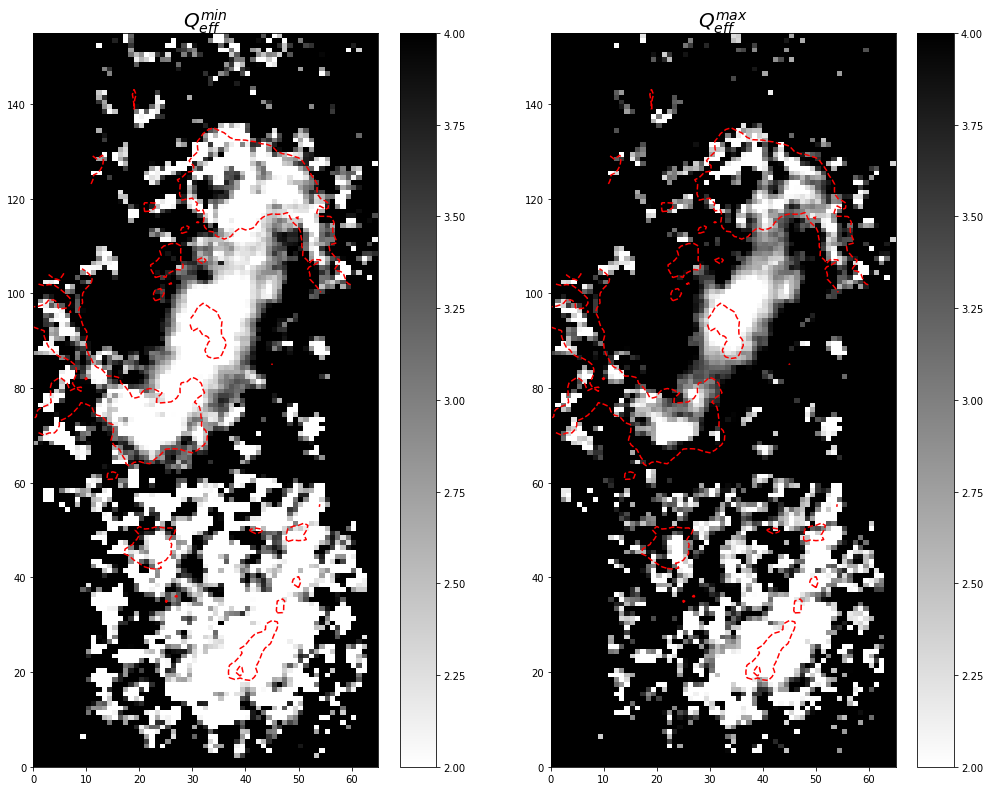

In [70]:

X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

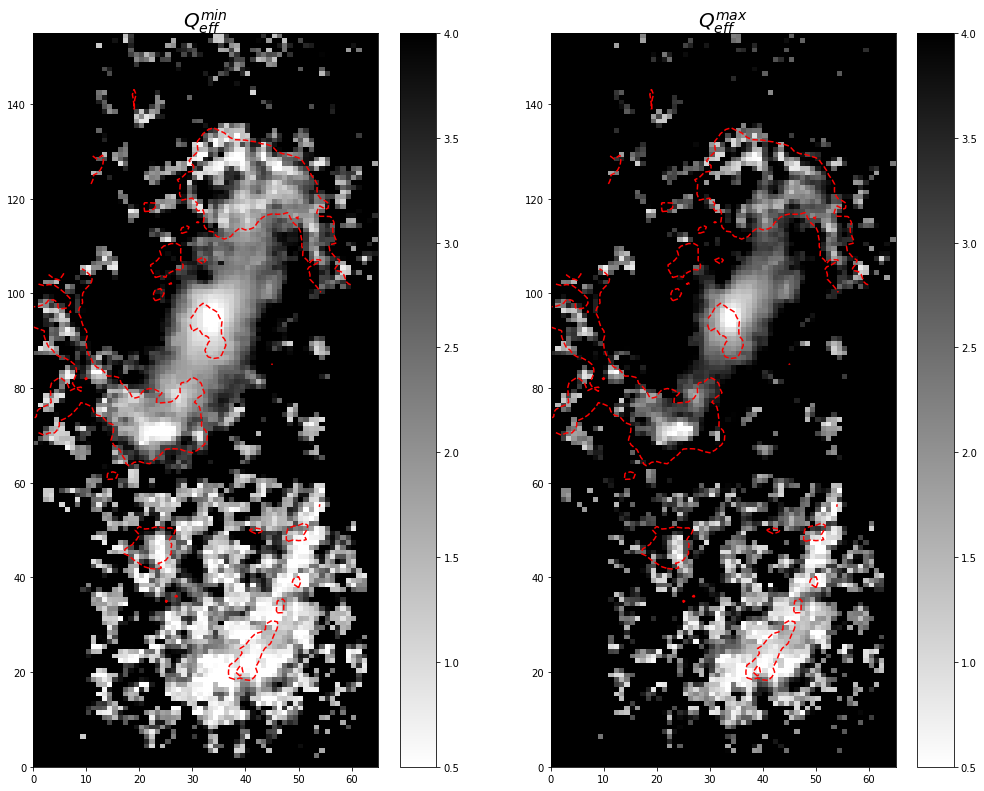

In [71]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

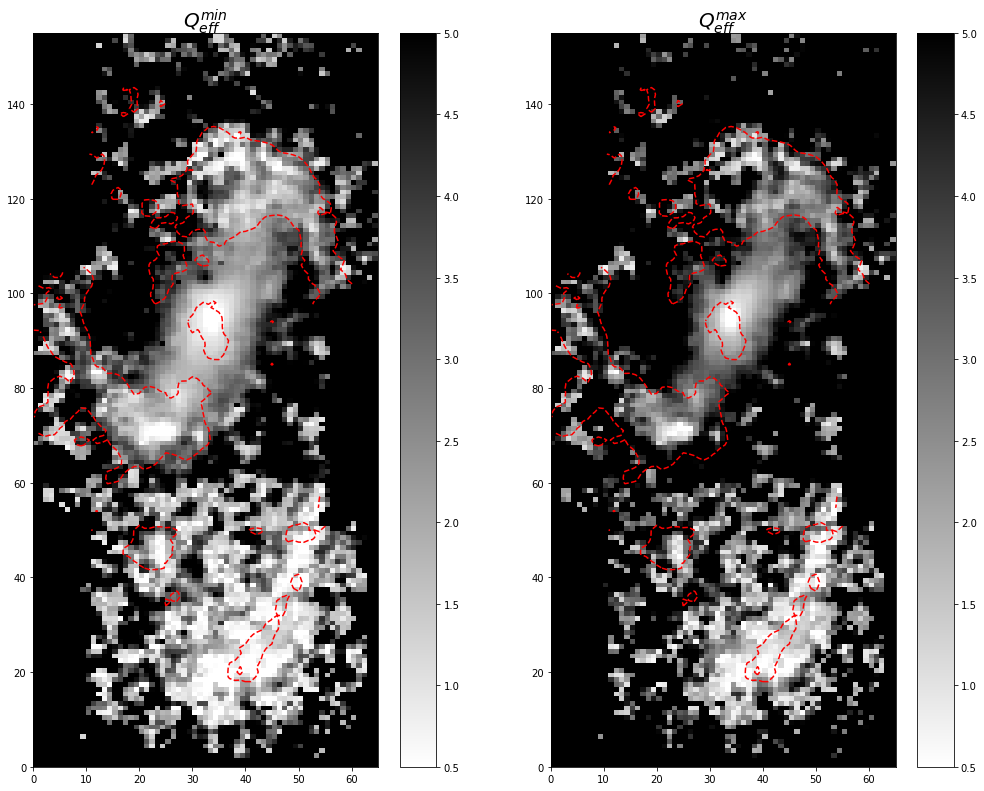

In [72]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=5.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=5.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

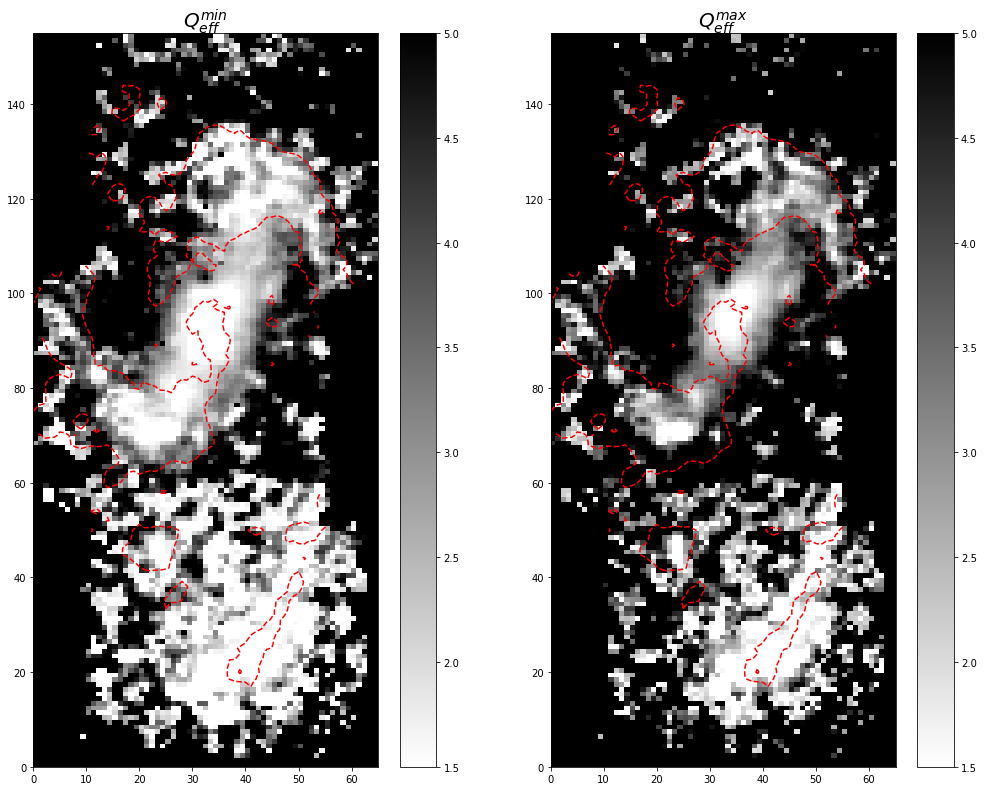

In [73]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1.5, vmax=5.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1.5, vmax=5.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

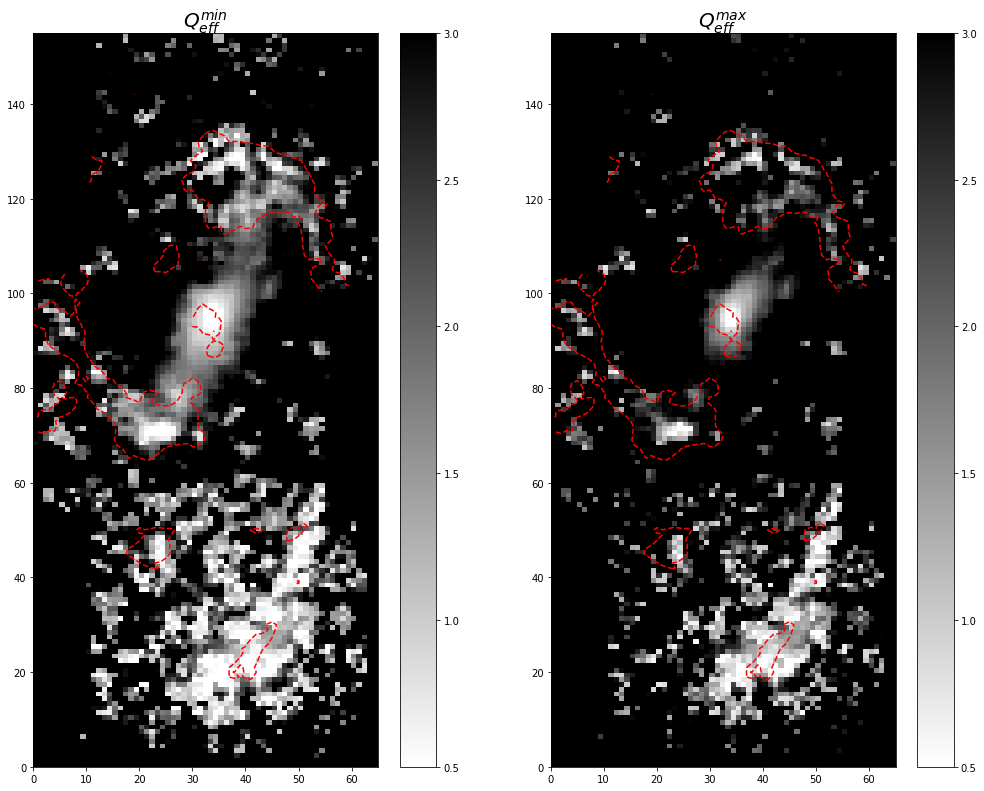

In [74]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.1,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=3.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.1,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

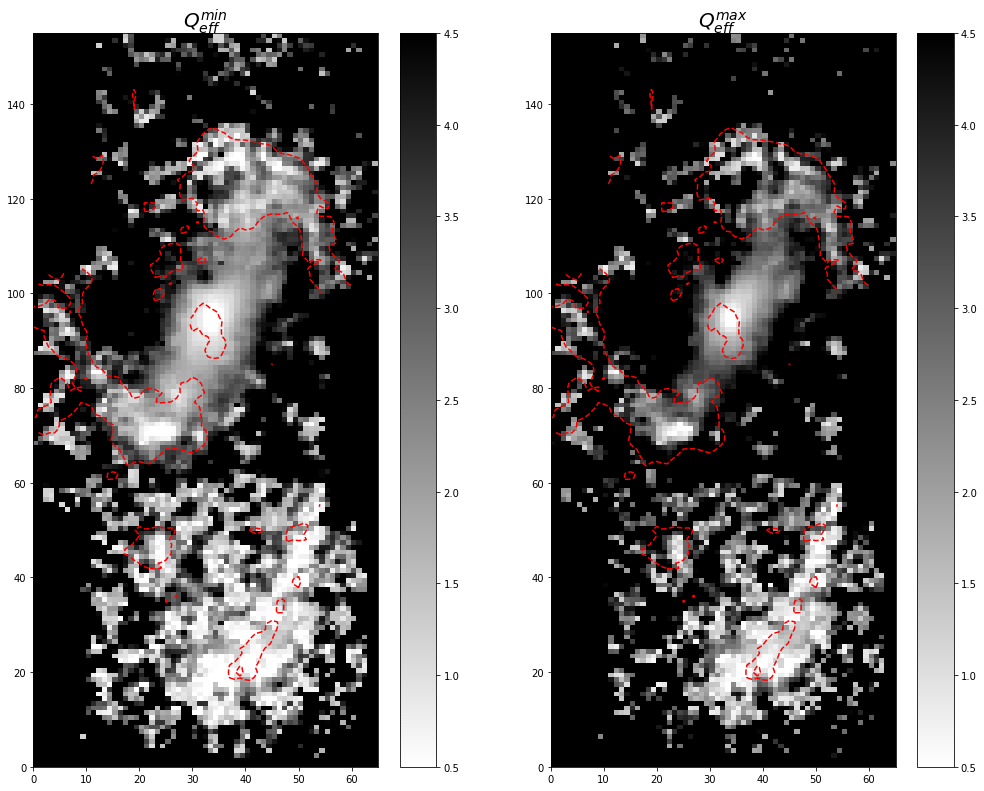

In [75]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.5)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.5)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

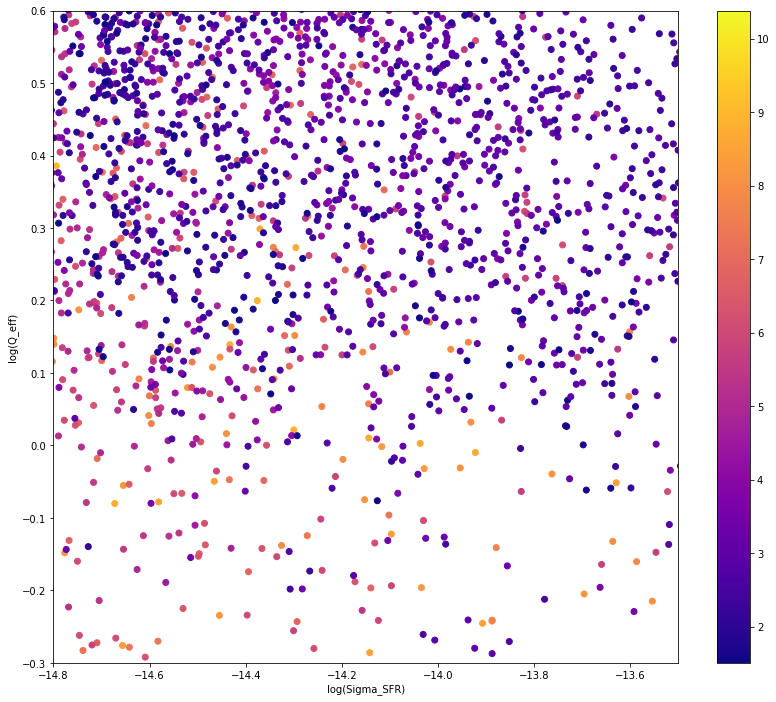

In [9]:
sigma_s = np.load('./data/sigma_s.npy')
H_alpha = np.load('./data/H_alpha.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
mask = (sigma_s != 0.) & (dist_kpc > 1.5) & (Qeff_min < 5)

# create data
x = np.log10(H_alpha[mask].ravel())
y = np.log10(Qeff_min[mask].ravel())
cmm = (cm.rainbow(np.linspace(0,1,100*len(x))))

# Make the plot
plt.figure(figsize=[14, 12])
# plt.hexbin(x, y, gridsize=100, bins='log', cmap='plasma', vmin=0.2, vmax=1.5)
sc = plt.scatter(x, y, c=[l for l in dist_kpc[mask].ravel()], cmap='plasma')
plt.ylim(-0.3, 0.6)
plt.xlim(-14.8, -13.5)
plt.colorbar(sc)
#plt.axhline(y=np.log10(3.), ls='--', color='g')
#plt.axvline(x=-2.3, ls='--', color='g')
# kslaw = 1.48
# kslaw_bias = 5.
# plt.plot([-4., -2.], [-4.*kslaw+kslaw_bias, -2.*kslaw+kslaw_bias], '--', lw=20, color='g')
plt.xlabel('log(Sigma_SFR)')
plt.ylabel('log(Q_eff)')
plt.show()

# Instability based on galactic shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

$A = 0.5 \dfrac{v(r_{gal})}{r_{gal}} (1-\beta)$
>The practical advantage of shear over Qgas is that shear is low in dwarf galaxies and the inner disks of spiral galaxies (β = 1 for solid body rotation), both locales where widespread star formation is observed. In the outer disks of spiral galaxies — where star formation cutoffs are observed — rotation curves tend to be flat (β = 0)

Посчитаем критическое значение плотности газа для каждого пикселя

In [10]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [11]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [12]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
max_dist = dist_kpc.max()
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if (dist_kpc[i][j] <= 1/3 * max_dist):
            beta = 0.75
        elif ((dist_kpc[i][j] > 1/3 * max_dist) and (dist_kpc[i][j] <= 2/3 * max_dist)):
            beta = 0.5
        elif ((dist_kpc[i][j] > 2/3 * max_dist) and (dist_kpc[i][j] <= max_dist)):  
            beta = 0.1
        A = 0.5 * velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] * (1-beta) 
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 2.5 * A * sigma_g / np.pi / G

In [13]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


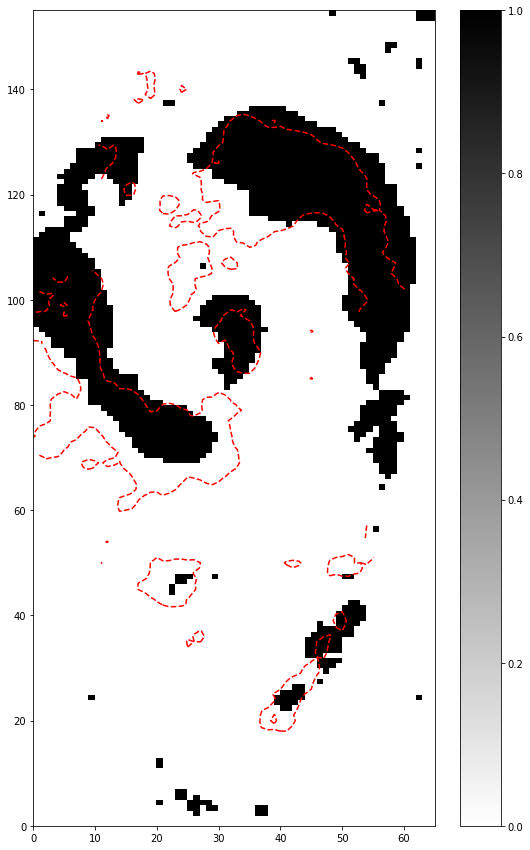

In [15]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [17]:
Inst_field1 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        Inst_field1[i][j] = Sigma_crit[i][j] / Sigma_gas 

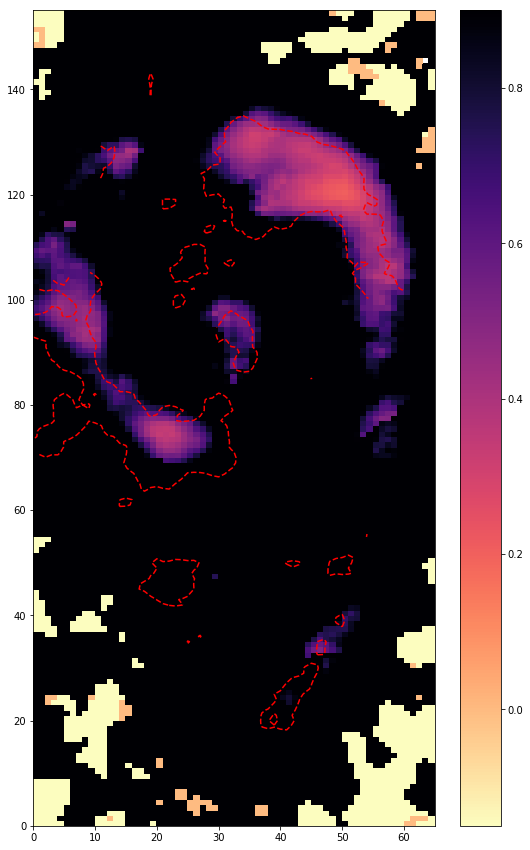

In [29]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='magma_r')
quadmesh.set_clim(vmin=-0.15, vmax = 0.9)
plt.colorbar()